In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
print("Directorio actual:", os.getcwd())
# Have all columns appear when dataframes are displayed.
pd.set_option('display.max_columns', None) 
# Have 100 rows appear when a dataframe is displayed
pd.set_option('display.max_rows', 500)
# Display dimensions whenever a dataframe is printed out.
pd.set_option('display.show_dimensions', True)

installment_payments = pd.read_csv(r'C:/Users/Yeray/Desktop/DATA_SCIENCE_ML/Home-Credit-TFG/DATA/home-credit-default-risk/installments_payments.csv')

Directorio actual: c:\Users\Yeray\Desktop\DATA_SCIENCE_ML\Home-Credit-TFG\JUPYTER_NOTEBOOKS


In [7]:
print(installment_payments.shape)
print(installment_payments.info())
display(installment_payments.describe())
print(installment_payments.dtypes)

(13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
Length: 8, dtype: object


In [ ]:
#En este caso parece que no tenemos variables categóricas
#Vamos a ver la relación entre la cantidad de clientes y la cantidad de pagos
print(installment_payments['SK_ID_CURR'].nunique())
print(installment_payments['SK_ID_PREV'].nunique())

#Podemos ver que en total hay 997752 pagos anteriores y 339587 clientes. 
#La principal información que tenemos de cada pago viene a ser:
#-NUM_INSTALMENT_VERSION: Número de versión del calendario de cuotas, si varia de una cuota a otra, el plan de pagos cambió.
#-NUM_INSTALMENT_NUMBER: Número de cuota en el plan de pagos.
#-DAY_INSTALMENT: Día de pago programado, es decir, cuando debería de haberse pagado.
#-DAY_ENTRY_PAYMENT: Día en que se realizó el pago. Si es mayor que DAY_INSTALLMENT significa que se retrasó.
#-AMT_INSTALMENT: Cantidad de la cuota programada, es decir, la cantidad que debería de haberse pagado.
#-AMT_PAYMENT: Cantidad de la cuota pagada, es decir, la cantidad que se pagó. 
# Si es mayor que AMT_INSTALMENT significa que se pagó de más.

#Simplemente viendo las definiciones de las variables podemos sacar conclusiones sobre la relación entre las variables.
#Esto nos vuelve a demostrar la importancia de entender el negocio y las variables para poder hacer un buen análisis 
# de los datos, pues el feature engineering se basa en esto y sale solo viendo las definiciones de las variables.

339587
997752


In [6]:
#10 primeras filas
display(installment_payments.head(10))

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375,5970.375
6,2234264,184693,4.0,11,-349.0,-352.0,29432.295,29432.295
7,1818599,111420,2.0,4,-968.0,-994.0,17862.165,17862.165
8,2723183,112102,0.0,14,-197.0,-197.0,70.740,70.740
9,1413990,109741,1.0,4,-570.0,-609.0,14308.470,14308.470


<Figure size 1000x600 with 0 Axes>

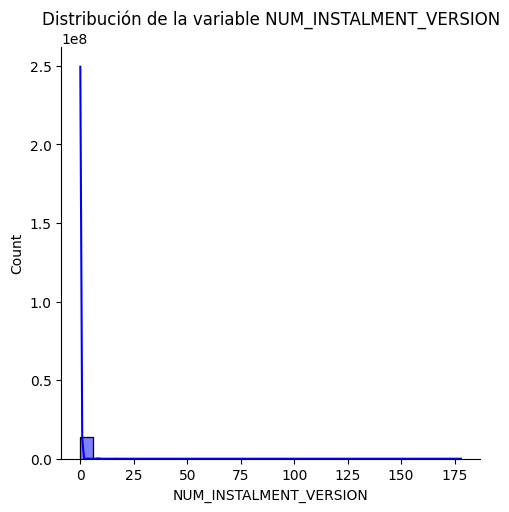

<Figure size 1000x600 with 0 Axes>

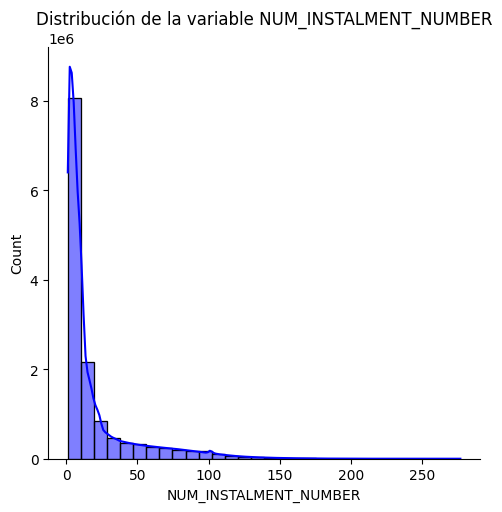

<Figure size 1000x600 with 0 Axes>

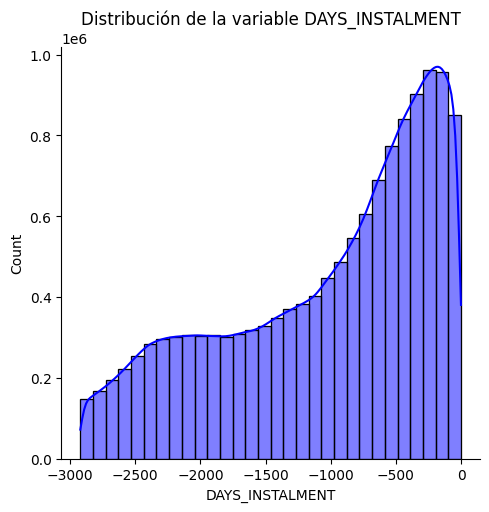

<Figure size 1000x600 with 0 Axes>

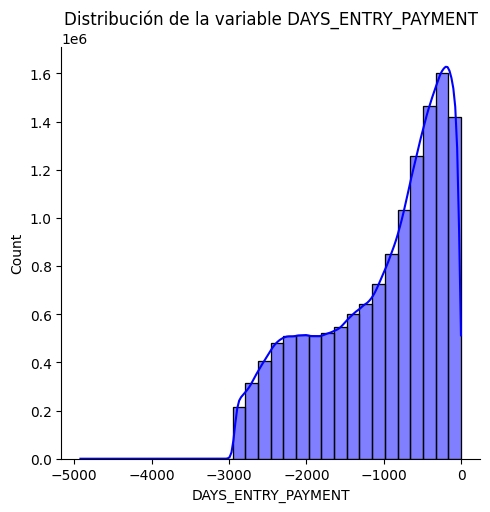

<Figure size 1000x600 with 0 Axes>

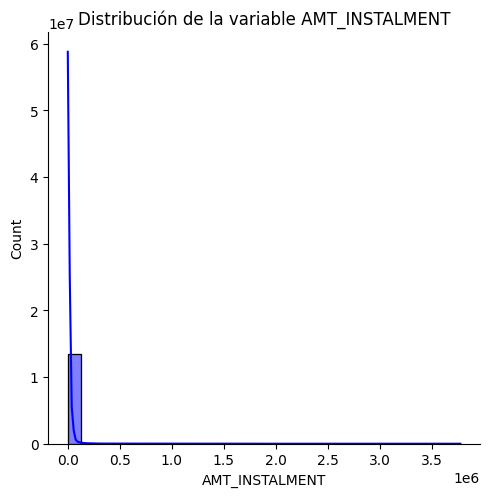

<Figure size 1000x600 with 0 Axes>

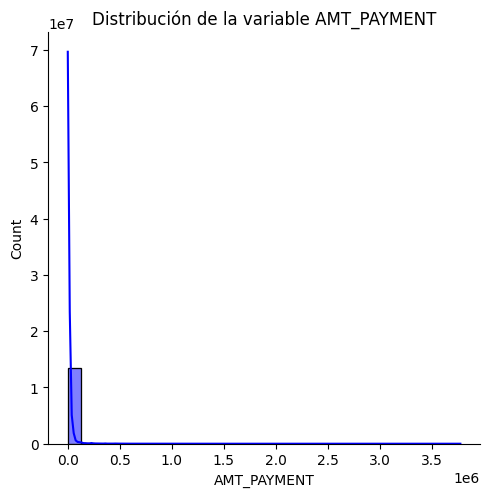

In [8]:
#Vamos a ver la distribución de las variables numéricas (excepto SK_ID_CURR y SK_ID_PREV)
variables_numericas = installment_payments.select_dtypes(include=[np.number]).columns
variables_numericas = variables_numericas.drop(['SK_ID_CURR', 'SK_ID_PREV'])

for var in variables_numericas:
    plt.figure(figsize=(10,6))
    sns.displot(installment_payments[var], bins=30, kde=True, color='blue')
    plt.title(f'Distribución de la variable {var}')
    plt.show()